```bash
$ conda create -n nii
$ conda activate nii
$ conda install jupyter scikit-learn matplotlib
$ conda install -c conda-forge nibabel
$ python -m ipykernel install --user --name nii --display-name "Python (nii)"
$ jupyter notebook```

# Load images

In [21]:
import numpy as np
import matplotlib.pyplot as plt

import nibabel as nib

In [ ]:
plt.figure()
for i in range(size):
    plt.subplot(1, size, i+1)
    plt.imshow(frames[i], cmap='binary')
    
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

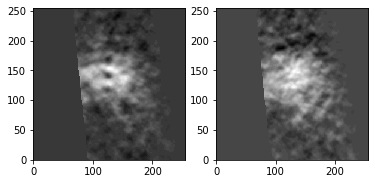

In [54]:
img1 = nib.load('rrICTAL.nii')
img2 = nib.load('rrINTERICTAL.nii')

N = np.random.randint(160)
plt.figure()
for i, img in enumerate([img1, img2]):
    img_data = img.get_fdata()
    a_slice = img_data[N, :, :]
    plt.subplot(1, 2, i+1)
    plt.imshow(a_slice, cmap="gray", origin="lower")
plt.show()

In [35]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# Standard Normalization over all images

In [95]:
sc1 = StandardScaler()

# way 1
img_data1 = img1.get_data().reshape(-1, 1)
print(img_data1.shape)

img_data2 = sc1.fit_transform(img_data1).reshape(img1.get_data().shape).T
print(sc1.mean_, sc1.var_)


sc2 = StandardScaler()

# mean must be 0 and var 1 over transform data
img_data3 = sc2.fit_transform(img_data2.reshape(-1, 1)).reshape(img1.get_data().shape)
print(sc2.mean_, sc2.var_)

(10485760, 1)
[13.56789036] [566.17072831]
[-2.76861867e-16] [1.]


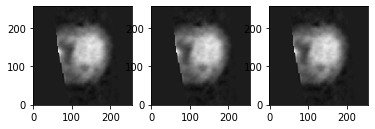

In [124]:
N = np.random.randint(160)
plt.figure()
for i, img in enumerate([img_data1, img_data2, img_data3]):
    img_data = img.reshape(img1.shape)
    a_slice = img_data[N, :, :]
    plt.subplot(1, 3, i+1)
    plt.imshow(a_slice, cmap="gray", origin="lower")
plt.show()

# Standard Normalization over each image¶

In [120]:
sc1 = StandardScaler()

# way 2
img_data1 = img1.get_data().reshape(img1.get_data().shape[0], -1)
print(img_data1.shape)

img_data2 = sc1.fit_transform(img_data1.T).T.reshape(img1.get_data().shape)
print(img_data2.shape)

# A mano

mean = np.mean(img_data2, axis=(1, 2))
var = np.var(img_data2, axis=(1, 2))
print(mean, var)


sc2 = StandardScaler()
img_data3 = img_data2.reshape(img1.get_data().shape[0], -1)

# mean must be 0 and var 1 over transform data
img_data3 = sc2.fit_transform(img_data3.T).T.reshape(img1.get_data().shape)
print(sc2.mean_, sc2.var_)

(160, 65536)
(160, 256, 256)
[-2.77555756e-17  2.08166817e-17  2.77555756e-17  0.00000000e+00
  1.38777878e-17  6.93889390e-18  4.85722573e-17 -4.85722573e-17
  2.77555756e-17  0.00000000e+00  4.85722573e-17  6.93889390e-18
  2.08166817e-17  6.93889390e-18  2.77555756e-17 -6.24500451e-17
  6.93889390e-18 -1.38777878e-17  6.93889390e-18  2.08166817e-17
 -1.38777878e-17  2.08166817e-17  9.71445147e-17 -8.32667268e-17
 -1.11022302e-16  2.77555756e-17  2.77555756e-17  1.38777878e-17
  8.32667268e-17  5.55111512e-17 -2.77555756e-17  1.38777878e-17
  4.16333634e-17  8.32667268e-17  6.93889390e-17 -8.32667268e-17
  5.55111512e-17 -1.38777878e-17  5.55111512e-17  2.77555756e-17
  9.71445147e-17  5.55111512e-17  9.71445147e-17  6.93889390e-17
  5.55111512e-17 -5.55111512e-17 -6.93889390e-17 -6.93889390e-17
  5.55111512e-17  4.16333634e-17  6.93889390e-17 -8.32667268e-17
  0.00000000e+00  8.32667268e-17  5.55111512e-17 -8.32667268e-17
  9.71445147e-17 -1.11022302e-16  1.38777878e-17 -2.77555756e

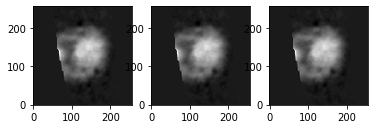

In [123]:
N = np.random.randint(160)
plt.figure()
for i, img in enumerate([img_data1, img_data2, img_data3]):
    img_data = img.reshape(img1.shape)
    a_slice = img_data[N, :, :]
    plt.subplot(1, 3, i+1)
    plt.imshow(a_slice, cmap="gray", origin="lower")
plt.show()